# Basic code for 1D problems

In [1]:
# make sure scipy is available in thebe: numpy and matplotlib available by default
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Module to add Ginzburg-Landau plot

import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def glsol(kappa,A,B):
  a,ba,fa=A
  b,bb,fb=B
  nodes=5
  def dY(x,Y): # Y=[f,df,a,b=da]
    f,df,a,b = Y
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),b,a*f**2))
  def bc(Ya, Yb):
    return np.array([Ya[0]-fa, Yb[0]-fb, Ya[3]-ba,Yb[3]-bb])
  rng=[a, b]
  x = np.linspace(*rng, nodes)
  Y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    Y[0,k]=1
  return solve_bvp(dY, bc, x, Y)

def glplot(kappa,A,B,tex):
  sol=glsol(kappa,A,B)
  x_plot = np.linspace(A[0],B[0], 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot,label=f"$f: {tex}$")
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot,label=f"$b: {tex}$")
  return 0


## Basic usage

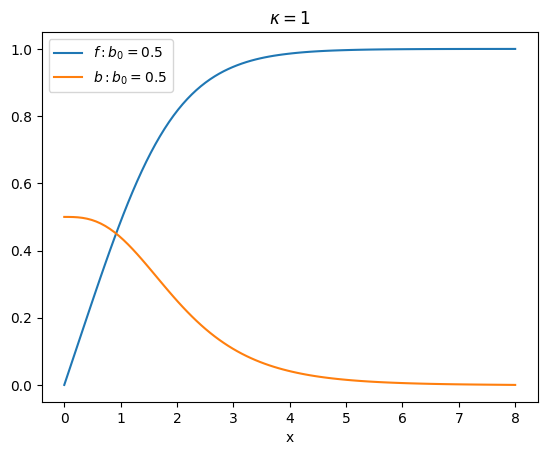

In [3]:
# basic usage
kappa=1
b0=0.5
a,ba,fa=0,b0,0
b,bb,fb=8,0,1
glplot(kappa,(a,ba,fa),(b,bb,fb),f"b_0={b0}")
plt.xlabel("x")
plt.title(f"$\kappa={kappa}$")
plt.legend()
plt.show()

In [4]:
glsol(kappa,(a,ba,fa),(b,bb,fb))

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  2.500e-01 ...  6.000e+00  8.000e+00]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7f60ad4c70>
             p: None
             y: [[ 3.436e-21  1.251e-01 ...  9.991e-01  1.000e+00]
                 [ 5.000e-01  5.011e-01 ...  1.237e-03  2.037e-04]
                 [-1.113e+00 -9.878e-01 ... -5.760e-03 -1.613e-03]
                 [ 5.000e-01  4.987e-01 ...  5.526e-03  0.000e+00]]
            yp: [[ 5.000e-01  5.011e-01 ...  1.237e-03  2.037e-04]
                 [ 8.183e-22 -1.073e-03 ... -1.706e-03  2.601e-06]
                 [ 5.000e-01  4.987e-01 ...  5.526e-03  0.000e+00]
                 [-1.314e-41 -1.547e-02 ... -5.750e-03 -1.613e-03]]
 rms_residuals: [ 1.630e-04  1.649e-04  1.482e-04  1.015e-04  2.836e-04
                  4.109e-04  2.611e-04  8.918e-05  5.159e-04  2.759e-04
                  9.919e-05  1.810e-04]
         